In [1]:
import sys
sys.path.append("../src")

import generate_general_networks as generate
import torch
import matplotlib.pyplot as plt
import json
import numpy as np
import tikzplotlib

In [2]:
# Load results from optimization
f = open("../optimization_results/general_optimization/single_lane.json")
results = json.load(f)
f.close()

f = open("../optimization_results/general_optimization/single_lane_1.json")
results_1 = json.load(f)
f.close()

In [3]:
# Collecting network configuration
network_file = results['network_file']
f = open("../"+network_file)
network_config = json.load(f)
f.close()

T = network_config['T']
N = network_config['N']
controls = network_config['control_points'][0]

In [4]:
# Collecting the start and final parameters
start = results['parameters'][0]
end = results['parameters'][-1]
objective_vals = results['objectives']
parameters = results['parameters']

start_1 = results_1['parameters'][0]
end_1 = results_1['parameters'][-1]
objective_vals_1 = results_1['objectives']
parameters_1 = results_1['parameters']

In [5]:
# Create the networks
start_speed = [torch.tensor(v) for v in start]
end_speed = [torch.tensor(v) for v in end]
start_speed_1 = [torch.tensor(v) for v in start_1]
end_speed_1 = [torch.tensor(v) for v in end_1]

start_network = generate.single_lane_network(T, N, start_speed, controls, track_grad=False)
end_network = generate.single_lane_network(T, N, end_speed, controls, track_grad=False)
start_network_1 = generate.single_lane_network(T, N, start_speed_1, controls, track_grad=False)
end_network_1 = generate.single_lane_network(T, N, end_speed_1, controls, track_grad=False)

In [6]:
# Do the simulations
densities, _, lengths, delays, n_stops = start_network.solve_cons_law_counting()
end_densities, _, end_lengths, end_delays, end_n_stops = end_network.solve_cons_law_counting()

densities_1, _, lengths_1, delays_1, n_stops_1 = start_network_1.solve_cons_law_counting()
end_densities_1, _, end_lengths_1, end_delays_1, end_n_stops_2 = end_network_1.solve_cons_law_counting()

Bus bus_1 reached bus stop 0 at time 25.714275360107422, should wait for 29.915130615234375 seconds
Bus bus_1 reached bus stop 0 at time 20.571435928344727, should wait for 29.932104110717773 seconds
Bus bus_1 reached bus stop 0 at time 51.428550720214844, should wait for 29.830259323120117 seconds
Bus bus_1 reached bus stop 0 at time 20.571435928344727, should wait for 29.932104110717773 seconds


In [7]:
# Converting from dict to lists
times = list(lengths[0].keys())
distance = list(lengths[0].values())

end_times = list(end_lengths[0].keys())
end_distance = list(end_lengths[0].values())

times_1 = list(lengths_1[0].keys())
distance_1 = list(lengths_1[0].values())

end_times_1 = list(end_lengths_1[0].keys())
end_distance_1 = list(end_lengths_1[0].values())

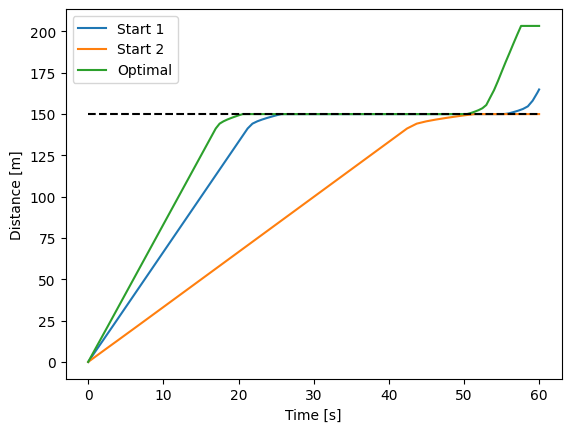

In [9]:
# Plotting results

plt.plot(times, distance, label = "Start 1")
plt.plot(times_1, distance_1, label = "Start 2")
plt.plot(end_times, end_distance, label = "Optimal")
plt.plot([0, 60], [150, 150], '--k')
plt.ylabel("Distance [m]")
plt.xlabel("Time [s]")
plt.legend()
tikzplotlib.save("../figurer/single_lane_dist_time.tex")

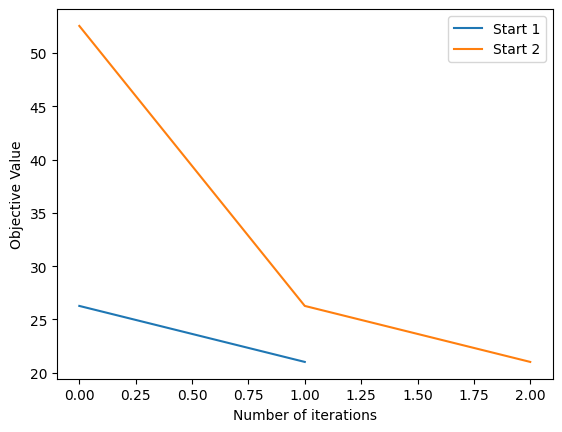

In [10]:
plt.plot([i for i in range(len(objective_vals)-1)], objective_vals[:-1], label = "Start 1")
plt.plot([i for i in range(len(objective_vals_1)-1)], objective_vals_1[:-1], label = "Start 2")

plt.xlabel("Number of iterations")
plt.ylabel("Objective Value")
plt.legend()
tikzplotlib.save("../figurer/single_lane_conv.tex")

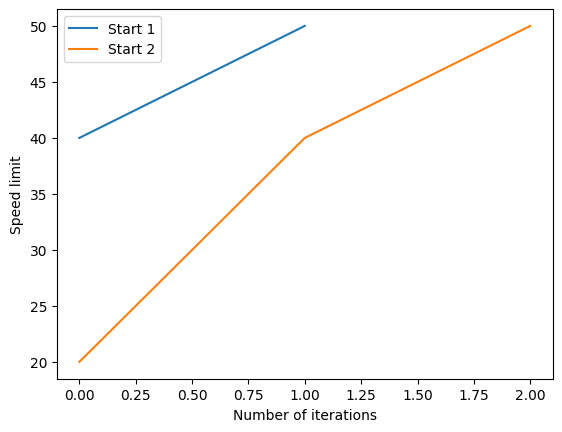

In [11]:
plt.plot([i for i in range(len(parameters)-1)], parameters[:-1], label = "Start 1")
plt.plot([i for i in range(len(parameters_1)-1)], parameters_1[:-1], label = "Start 2")

plt.xlabel("Number of iterations")
plt.ylabel("Speed limit")
plt.legend()
tikzplotlib.save("../figurer/single_lane_speeds.tex")